In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('Covid_logistic_regression/Covid_data.csv')

In [3]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [4]:
df['Contact_with_covid_patient'] = df['Contact_with_covid_patient'].str.lower()

In [5]:
gender_lab = LabelEncoder()
gender = gender_lab.fit_transform(df['Gender'])

In [6]:
severity_lab = LabelEncoder()
severity = severity_lab.fit_transform(df['Severity'])

In [7]:
contact_lab = LabelEncoder()
contact = contact_lab.fit_transform(df['Contact_with_covid_patient'])

In [8]:
gender_onehot = OneHotEncoder(sparse=False)
gender = gender_onehot.fit_transform(gender.reshape(-1,1))

In [9]:
severity_onehot = OneHotEncoder(sparse=False)
severity = severity_onehot.fit_transform(severity.reshape(-1,1))

In [10]:
contact_onehot = OneHotEncoder(sparse=False)
contact = contact_onehot.fit_transform(contact.reshape(-1,1))

In [11]:
df_updated = df.drop('Gender',axis=1)

In [12]:
df_updated = df_updated.drop('Severity',axis=1)
df_updated = df_updated.drop('Contact_with_covid_patient',axis=1)

In [13]:
df_updated.head()

,Country,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,China,10,102,1,0,0,0,1,0
1,Italy,20,103,1,1,0,0,0,1
2,Iran,55,99,0,0,0,1,1,0
3,Republic of Korean,37,100,0,1,1,0,0,1
4,France,45,101,1,1,1,1,0,1


In [14]:
X = df_updated.iloc[:,1:-1].values
y = df['Infected'].values

In [15]:
X = np.c_[X,gender,severity,contact]

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [28]:
dt = DecisionTreeClassifier(criterion='entropy')

In [29]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
y_pred = dt.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.9376

In [34]:
from sklearn import tree

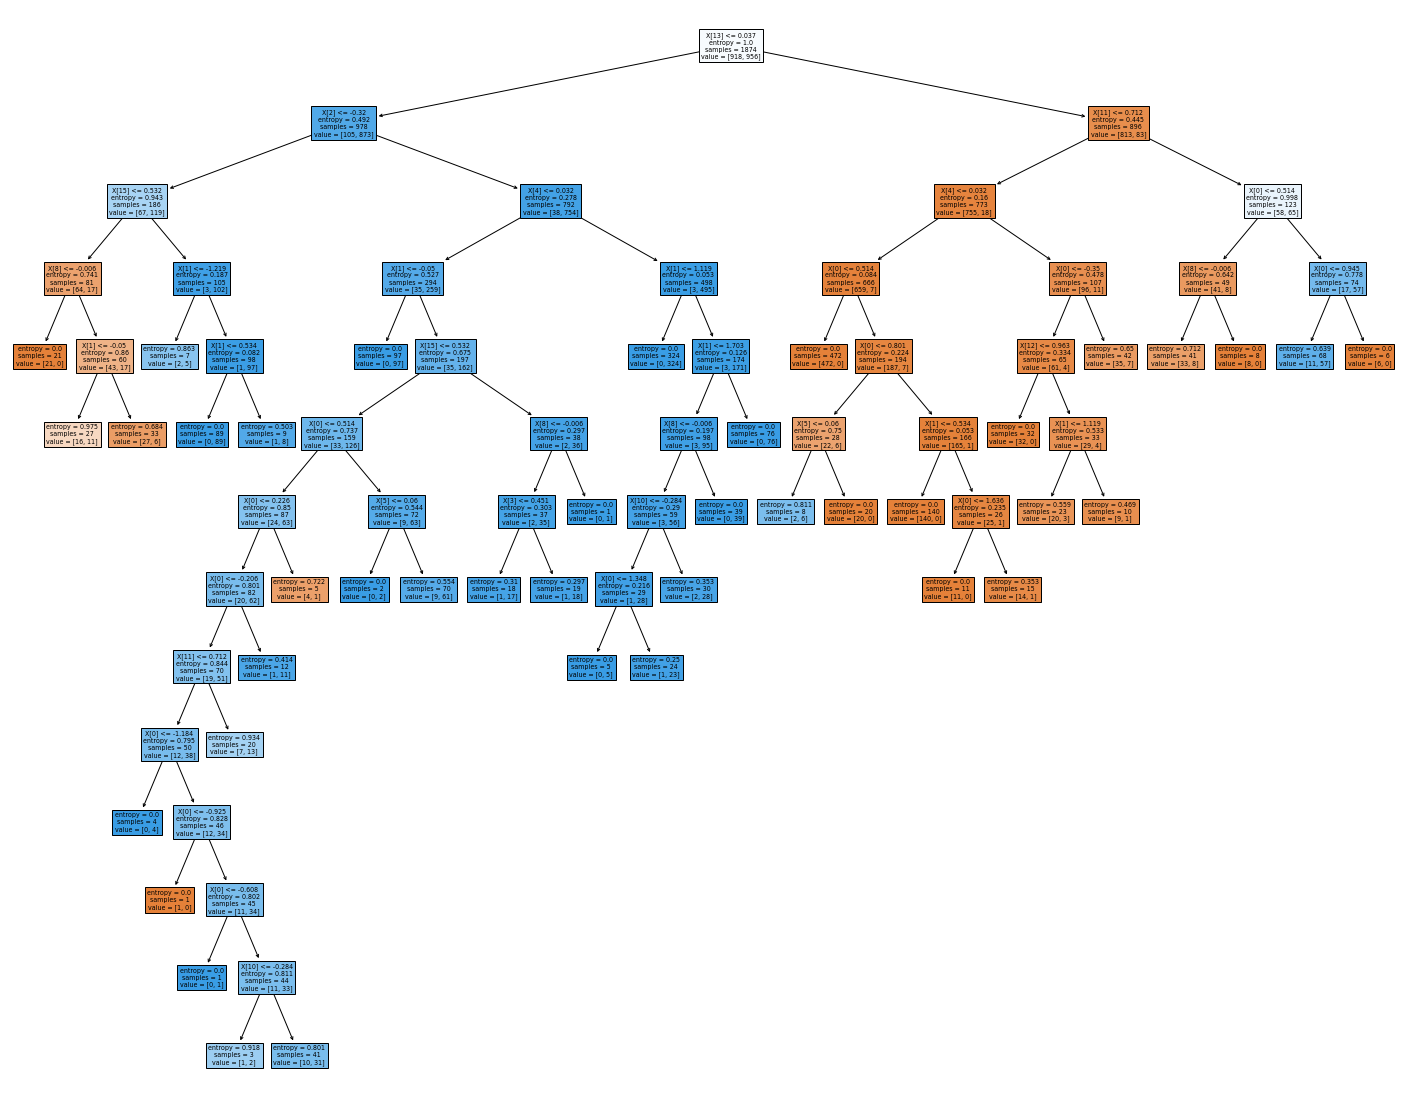

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True)

In [37]:
fig.savefig('tree_covid_19.png')